# <span style="font-size:30px">Can You Predict the Finalist in Association of Tennis Professionals (ATP) Tournament Finals?</span>

## Introduction 

If you're someone who has played tennis in the past or someone who follows the sport, you probably know that certain players emerge as favorites, consistently winning the majority of trophies. Unlike team sports, where there may be several top performers, individual sports like tennis often see players who win at least one championship every year.

As someone who grew up playing tennis for fun and recreation, I've recently embraced a more competitive approach by participating in leagues. I've come to realize that predicting the winner of a match solely based on past scores can be challenging. I've lost multiple times to an opponent I had previously defeated, simply due to factors like the specific court, a good night's sleep, or incorporating a small technique such as top spin.

This curiosity led me to explore a comprehensive tennis dataset spanning from 1991 to 2016. My goal was to extract key insights related to tournament types, years, the frequency of players reaching the finals, players with the most titles, players with the most final losses, and even an analysis of the nationalities of top players.

While predicting the two finalists in a tournament is an inherently challenging task, with limited resources available in this dataset, I was still eager to create a model and attempt to predict the finalists for the year 2017.




## DATASET

The dataset used for this analysis was obtained from [DataHub](https://datahub.io/sports-data/atp-world-tour-tennis-data), which provides ATP World Tour tennis data. It offers a rich collection of historical tennis data, including match results, player rankings, and more. This dataset is publicly available for analysis by anyone interested.

<b> I will now proceed to load the dataset below and provide detailed explanations to ensure convenience for the user in following along </b>

In [1484]:
#Loading the neccessary libraries for analysis and load the dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os as os
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings("ignore")
os.getcwd()
os.chdir('/Users/zishanvisram/Documents/DATA605/Project/')

In [1485]:
df=pd.read_csv('match_scores.csv') # reading the csv file and converting it into a dataframe
df.head(3) # reading the first 3 rows of the data and showing all the columns

,tourney_year_id,tourney_order,tourney_slug,tourney_url_suffix,tourney_round_name,round_order,match_order,winner_name,winner_player_id,winner_slug,loser_name,loser_player_id,loser_slug,winner_seed,loser_seed,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,match_id,match_stats_url_suffix
0,1991-7308,1,adelaide,/en/scores/archive/adelaide/7308/1991/results,Finals,1,1,Nicklas Kulti,k181,nicklas-kulti,Michael Stich,s351,michael-stich,NaN,6,63 16 62,2,1,13,11,0,0,1991-7308-k181-s351,/en/scores/1991/7308/MS001/match-stats
1,1991-7308,1,adelaide,/en/scores/archive/adelaide/7308/1991/results,Semi-Finals,2,1,Michael Stich,s351,michael-stich,Jim Courier,c243,jim-courier,6,2,64 76(6),2,0,13,10,1,0,1991-7308-s351-c243,/en/scores/1991/7308/MS003/match-stats
2,1991-7308,1,adelaide,/en/scores/archive/adelaide/7308/1991/results,Semi-Finals,2,2,Nicklas Kulti,k181,nicklas-kulti,Magnus Larsson,l206,magnus-larsson,NaN,NaN,75 64,2,0,13,9,0,0,1991-7308-k181-l206,/en/scores/1991/7308/MS002/match-stats


In [1492]:
# Summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95359 entries, 0 to 95358
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tourney_year_id        95359 non-null  object
 1   tourney_order          95359 non-null  int64 
 2   tourney_slug           95359 non-null  object
 3   tourney_round_name     95359 non-null  object
 4   round_order            95359 non-null  int64 
 5   match_order            95359 non-null  int64 
 6   winner_name            95359 non-null  object
 7   winner_player_id       95359 non-null  object
 8   winner_slug            95359 non-null  object
 9   loser_name             95359 non-null  object
 10  loser_player_id        95359 non-null  object
 11  loser_slug             95359 non-null  object
 12  winner_seed            54893 non-null  object
 13  loser_seed             43165 non-null  object
 14  match_score_tiebreaks  95357 non-null  object
 15  winner_sets_won    


<b>From the results above, we can observe that our dataset consists of 95,359 rows and 20 columns. This information provides us with an understanding of the dataset's overall size and structure.

<b>Additionally, by examining the data types of each column, we can gain insights into the nature of the information contained within. Understanding the data types is crucial as it helps us determine whether any columns require formatting or type conversions to facilitate further analysis.

In [1036]:
df.columns

Index(['tourney_year_id', 'tourney_order', 'tourney_slug',
       'tourney_url_suffix', 'tourney_round_name', 'round_order',
       'match_order', 'winner_name', 'winner_player_id', 'winner_slug',
       'loser_name', 'loser_player_id', 'loser_slug', 'winner_seed',
       'loser_seed', 'match_score_tiebreaks', 'winner_sets_won',
       'loser_sets_won', 'winner_games_won', 'loser_games_won',
       'winner_tiebreaks_won', 'loser_tiebreaks_won', 'match_id',
       'match_stats_url_suffix'],
      dtype='object')

Here is a more efficient way to view all the columns in the dataframe. This step is crucial for understanding the different variables included in the dataset and selecting which columns are of great interest or can be dropped.

Based on the project's objectives, I am not particularly interested in the following columns and will be dropping them:

- `tourney_url_suffix`: As all the match results are already available, this column is not necessary.
- `match_id`: Since the analysis focuses on winners and losers based on round order, specific match IDs are not required.
- `match_stats_url_suffix`: This column is also irrelevant to the project's objective and can be safely dropped.

By eliminating these three columns, I can reduce the dataset's size and streamline the analysis.


In [1487]:
df.drop('tourney_url_suffix',axis=1,inplace=True)
df.drop('match_id',axis=1,inplace=True)
df.drop('match_stats_url_suffix',axis=1,inplace=True)

## DATA PREPROCESSING

Now that I have my dataset with the selected columns, I can delve deeper to gain more insights. One of the initial steps I take is to examine the unique values in certain columns and assess the amount of missing data present. This information helps me understand the characteristics of the dataset and guides me in handling any missing values.

In [1486]:
df['tourney_slug'].nunique()

125


The result of this line indicates that the dataset contains information for a total of 125 unique tournaments that have been played or hosted by ATP. While this may initially seem like a large number, our next step is to determine the extent to which the data about these tournaments is available and how much is missing. This will allow us to gain a better understanding of the completeness of the dataset.

In the upcoming step, we will delve deeper into the dataset and assess the presence of missing data. By examining the completeness of the information related to each tournament, we can evaluate the reliability and comprehensiveness of the dataset. This evaluation is crucial for ensuring the accuracy of any subsequent analysis or conclusions drawn from the data.

In [1489]:
#check for missing values
df.isnull().sum()

tourney_year_id              0
tourney_order                0
tourney_slug                 0
tourney_round_name           0
round_order                  0
match_order                  0
winner_name                  0
winner_player_id             0
winner_slug                  0
loser_name                   0
loser_player_id              0
loser_slug                   0
winner_seed              40466
loser_seed               52194
match_score_tiebreaks        2
winner_sets_won              0
loser_sets_won               0
winner_games_won             0
loser_games_won              0
winner_tiebreaks_won         0
loser_tiebreaks_won          0
dtype: int64

 From the result of this table, we can observe that the columns "winner_seed" and "loser_seed" contain missing values. The presence of missing values indicates that there may be incomplete information in these columns. While the overall integrity of the data appears to be high, our goal is to work with a dataset that has no missing values. 

It is crucial to address missing values to ensure unbiased analysis and optimal results when building a machine learning model. By handling missing values appropriately, we can avoid potential biases and improve the accuracy and reliability of our key findings.

In [1493]:
# This function provides a descriptive statistics of the numerical columns in the DataFrame
df.describe()

,tourney_order,round_order,match_order,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won
count,95359.000000,95359.000000,95359.000000,95359.000000,95359.000000,95359.000000,95359.000000,95359.000000,95359.000000
mean,35.812498,5.317264,9.892941,2.116832,0.391646,14.632138,9.609130,0.313258,0.083799
std,20.448849,1.846501,11.119167,0.399319,0.542826,3.840325,4.843903,0.529864,0.281853
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,4.000000,3.000000,2.000000,0.000000,12.000000,6.000000,0.000000,0.000000
50%,36.000000,5.000000,6.000000,2.000000,0.000000,13.000000,9.000000,0.000000,0.000000
75%,52.000000,6.000000,13.000000,2.000000,1.000000,17.000000,13.000000,1.000000,0.000000
max,92.000000,10.000000,64.000000,4.000000,3.000000,37.000000,33.000000,3.000000,2.000000


Based on the results of this table, we cannot draw any meaningful numerical insights as most of the numerical values correspond to the tournament name, participating players, and the order of rounds in the tournaments. To gain better insights and draw meaningful conclusions, we will need to create visualization plots.

Visualizations provide a graphical representation of the data, allowing us to identify patterns, trends, and relationships more easily. By visualizing the data, we can uncover valuable insights and make informed decisions based on the patterns and trends observed.

Therefore, in the next step, we will proceed with creating visualization plots to analyze the data more effectively.

## DATASET 2

From the same data source, I extracted a dataset containing the overview of each player. This dataset proved valuable in drawing insights regarding the top countries that have won the most Tennis Championships. Additionally, I utilized this dataset to compare key differences among players, such as their dominant hand and playing style, specifically analyzing their backhand techniques.

By exploring this dataset, we can gain a deeper understanding of the players' characteristics and identify patterns or trends related to their performance. Analyzing factors such as the dominant hand and playing style can provide insights into the strategies employed by successful players and highlight the impact of these factors on their overall performance.

In the subsequent sections, we will delve into this dataset to uncover significant findings and shed light on the players' profiles and attributes.

In [1041]:
player_df=pd.read_csv('Player_overview.csv')
player_df.head()

,player_id,player_slug,first_name,last_name,player_url,flag_code,residence,birthplace,birthdate,birth_year,birth_month,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand
0,a002,ricardo-acuna,Ricardo,Acuna,http://www.atpworldtour.com/en/players/ricardo...,CHI,"Jupiter, FL, USA","Santiago, Chile",1958.01.13,1958.0,1.0,13.0,0.0,150.0,68.0,"5'9""",69.0,175.0,NaN,NaN
1,a001,sadiq-abdullahi,Sadiq,Abdullahi,http://www.atpworldtour.com/en/players/sadiq-a...,NGR,NaN,NaN,1960.02.02,1960.0,2.0,2.0,0.0,0.0,0.0,"0'0""",0.0,0.0,NaN,NaN
2,a005,nelson-aerts,Nelson,Aerts,http://www.atpworldtour.com/en/players/nelson-...,BRA,NaN,"Cachoeira Do Sul, Brazil",1963.04.25,1963.0,4.0,25.0,0.0,165.0,75.0,"6'2""",74.0,188.0,NaN,NaN
3,a004,egan-adams,Egan,Adams,http://www.atpworldtour.com/en/players/egan-ad...,USA,"Palmetto, FL, USA","Miami Beach, FL, USA",1959.06.15,1959.0,6.0,15.0,0.0,160.0,73.0,"5'10""",70.0,178.0,NaN,NaN
4,a006,ronald-agenor,Ronald,Agenor,http://www.atpworldtour.com/en/players/ronald-...,USA,"Beverly Hills, California, USA","Rabat, Morocco",1964.11.13,1964.0,11.0,13.0,1983.0,180.0,82.0,"5'11""",71.0,180.0,NaN,NaN


In [1498]:
player_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10912 entries, 0 to 10911
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   player_id      10912 non-null  object 
 1   player_slug    10912 non-null  object 
 2   first_name     10912 non-null  object 
 3   last_name      10912 non-null  object 
 4   player_url     10912 non-null  object 
 5   flag_code      8727 non-null   object 
 6   residence      2014 non-null   object 
 7   birthplace     3038 non-null   object 
 8   birthdate      5114 non-null   object 
 9   birth_year     5114 non-null   float64
 10  birth_month    5114 non-null   float64
 11  birth_day      5114 non-null   float64
 12  turned_pro     1533 non-null   float64
 13  weight_lbs     2706 non-null   float64
 14  weight_kg      2706 non-null   float64
 15  height_ft      2658 non-null   object 
 16  height_inches  2658 non-null   float64
 17  height_cm      2658 non-null   float64
 18  handed

###  <font color="green"> I hope I still have your interest because its only going to get better from here </font>

 In the next steps, I will list the guiding questions that initially sparked my curiosity and drove the objective of this project. As I started analyzing the data, my curiosity grew, and I found myself wanting to delve deeper into various aspects of the analysis. However, the guiding questions below provide an overview of the project's objectives.

Please note that I haven't performed any data wrangling yet, as I prefer to approach the data analysis with a fresh perspective and explore the dataset as it is.


### Guiding Questions

I am interested in visualising key insights from the dataset
1) What are the most popular tounrmanets? Based on the number of occurence?

2) Who are the championship winners over time from the top 4 popular tournaments​

3) Who has won the most titles from these popular tounrmanets? and who has won the highest titles for each tounrmanet?

4) What can we infer about the style of backhand to the best players?

5) What can we infer about the hand dominant to the best players?

6) Between the most popular tournaments, which 2 players participated in highest number of final matches?

7) Which player has lost the most during a final?

8) Which Nationality dominates the championship titles from 1991-2016?

7) Can we create a Machine Learning model that can predict the finalist for the popular tournaments in 2017? 

### <font color="green"> Guiding Question 1 - What are the most popular tounrmanets? Based on the number of occurence? </font>


To answer this question, I will focus on the 'tourney slug' column as it contains the name of the tournament. Since each row represents the match information between two players, I can count the number of occurrences of each tournament to evaluate its popularity.

In [1042]:
df['tourney_year_id'].unique()

array(['1991-7308', '1991-354', '1991-301', ..., '2016-337', '2016-352',
       '2016-605'], dtype=object)

In [1500]:
number_of_tournament=df['tourney_slug'].value_counts()
tournament_counts = pd.DataFrame({'Tournament': number_of_tournament.index, 'Count': number_of_tournament.values})
tournament_counts_top=tournament_counts.head(10)
tournament_counts_top

,Tournament,Count
0,us-open,4422
1,australian-open,4422
2,wimbledon,4422
3,roland-garros,4422
4,miami,2830
5,indian-wells,2341
6,kitzbuhel,1823
7,rome,1768
8,monte-carlo,1704
9,cincinnati,1696


This step hows the count of the number of matches in each tournament and I am making the assumption that this signifies the popularity of the tournaments. That being said, I will also create a count plot showing the distribution of the number of matches to make easier interpreation

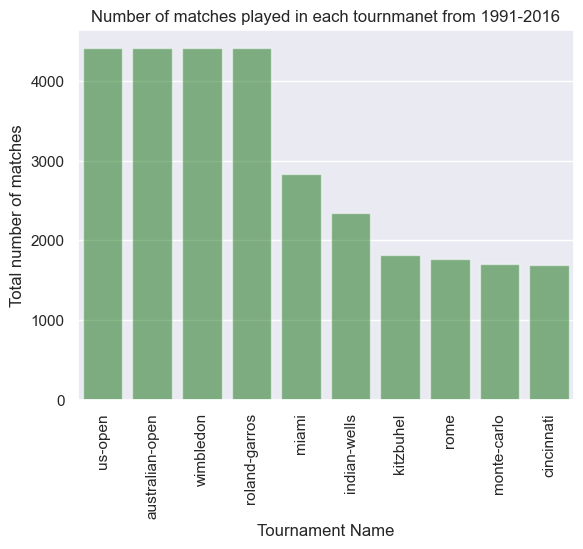

In [1501]:
sns.barplot(x='Tournament', y='Count', data=tournament_counts_top,color='green',alpha=0.5)
plt.xlabel('Tournament Name')
plt.ylabel('Total number of matches')
plt.title('Number of matches played in each tournmanet from 1991-2016')
plt.xticks(rotation=90)
plt.savefig('popular_tourney.png')
plt.show()

In [1511]:
tournament_counts_bottom=tournament_counts.sort_values(ascending=True,by='Count').head(10)

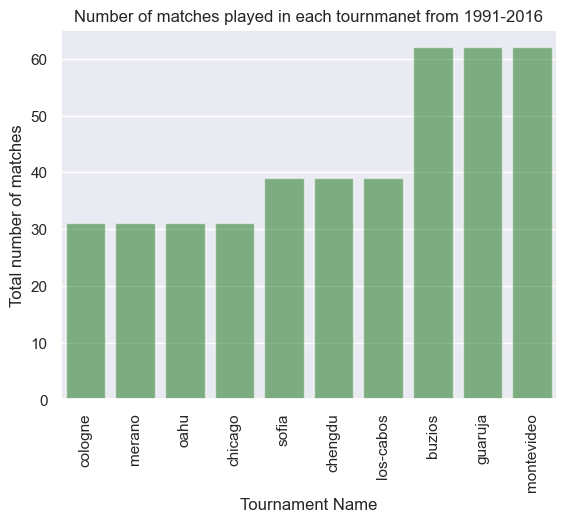

In [1512]:
sns.barplot(x='Tournament', y='Count', data=tournament_counts_bottom,color='green',alpha=0.5)
plt.xlabel('Tournament Name')
plt.ylabel('Total number of matches')
plt.title('Number of matches played in each tournmanet from 1991-2016')
plt.xticks(rotation=90)
plt.show()

I will focus on the top 4 tournaments with the highest number of occurence and also because these are the most popular tournaments known

In [1045]:
df['tourney_year_id'].sort_values(ascending=True)

280      1991-201
281      1991-201
279      1991-201
261      1991-201
262      1991-201
           ...   
94317     2016-96
94316     2016-96
94315     2016-96
94328     2016-96
94295     2016-96
Name: tourney_year_id, Length: 95359, dtype: object

In [1046]:
df_oldest_tourney=df[df['tourney_year_id'].str.contains('1991')]['tourney_slug'].value_counts().head(10)
df_oldest_tourney

roland-garros      127
australian-open    127
wimbledon          127
us-open            127
miami               95
sydney              78
kitzbuhel           78
brasilia            78
stuttgart           78
rome                63
Name: tourney_slug, dtype: int64

I am curious how the number of matches have fluctuated with time

In [1047]:
df.columns

Index(['tourney_year_id', 'tourney_order', 'tourney_slug',
       'tourney_url_suffix', 'tourney_round_name', 'round_order',
       'match_order', 'winner_name', 'winner_player_id', 'winner_slug',
       'loser_name', 'loser_player_id', 'loser_slug', 'winner_seed',
       'loser_seed', 'match_score_tiebreaks', 'winner_sets_won',
       'loser_sets_won', 'winner_games_won', 'loser_games_won',
       'winner_tiebreaks_won', 'loser_tiebreaks_won', 'match_id',
       'match_stats_url_suffix'],
      dtype='object')

In [1048]:
df['year']=df['tourney_year_id'].str[:4]
df['year']=pd.to_numeric(df['year'])
filtered_df=df[df['tourney_slug'].isin(['us-open','australian-open','wimbledon','roland-garros'])]

In [1049]:
finals_df=filtered_df[filtered_df['tourney_round_name']=='Finals']

In [1050]:
highest_winner = finals_df.groupby(['winner_name','winner_player_id','year']).size()
highest_winner

winner_name         winner_player_id  year
Albert Costa        c378              2002    1
Andre Agassi        a092              1992    1
                                      1994    1
                                      1995    1
                                      1999    2
                                             ..
Stefan Edberg       e004              1992    1
Thomas Johansson    j129              2002    1
Thomas Muster       m099              1995    1
Yevgeny Kafelnikov  k267              1996    1
                                      1999    1
Length: 81, dtype: int64

In [1051]:
highest_winner = highest_winner.reset_index()
highest_winner

,winner_name,winner_player_id,year,0
0,Albert Costa,c378,2002,1
1,Andre Agassi,a092,1992,1
2,Andre Agassi,a092,1994,1
3,Andre Agassi,a092,1995,1
4,Andre Agassi,a092,1999,2
...,...,...,...,...
76,Stefan Edberg,e004,1992,1
77,Thomas Johansson,j129,2002,1
78,Thomas Muster,m099,1995,1
79,Yevgeny Kafelnikov,k267,1996,1


In [1052]:
highest_winner = highest_winner.groupby(['winner_name', 'year']).agg({0: 'sum'}).reset_index()

In [1053]:
highest_winner['Tournaments_Won']=highest_winner[0]

In [1054]:
highest_winner.drop(0,axis=1,inplace=True)

In [1055]:
highest_winner=highest_winner.sort_values(by='Tournaments_Won',ascending=False)

In [1521]:
highest_winner.to_csv('highest_winnner.csv',index=False)
highest_winner

,winner_name,year,Tournaments_Won
32,Novak Djokovic,2011,3
55,Rafael Nadal,2010,3
62,Roger Federer,2004,3
64,Roger Federer,2006,3
65,Roger Federer,2007,3
...,...,...,...
26,Lleyton Hewitt,2002,1
25,Lleyton Hewitt,2001,1
24,Juan Martin del Potro,2009,1
23,Juan Carlos Ferrero,2003,1


In [1532]:
highest_winner[highest_winner['year']>2003]['winner_name'].nunique()

9

<AxesSubplot:xlabel='year', ylabel='Tournaments_Won'>

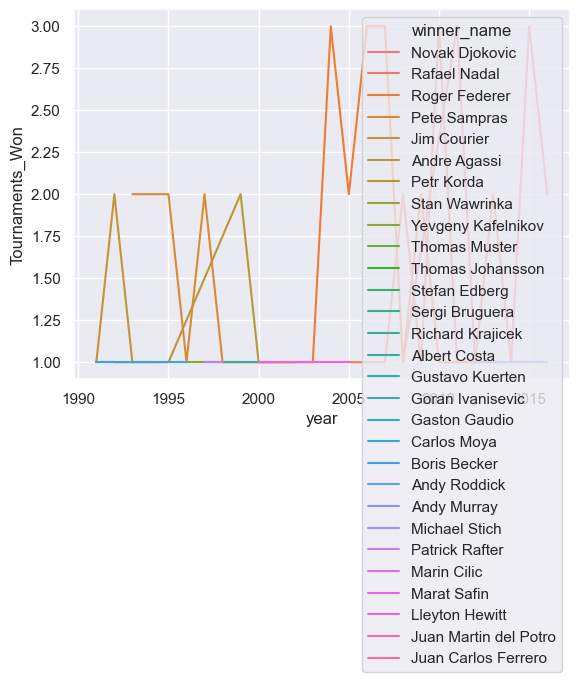

In [1523]:
sns.lineplot(data=highest_winner,x='year',y='Tournaments_Won',hue='winner_name')

In [1057]:
import ipywidgets as widgets
from IPython.display import display


In [1344]:
year_dropdown = widgets.Dropdown(
    options=list(range(1991, 2017)),
    value=1991,
    description='Select Year:',
    disabled=False,
)

In [1517]:
import numpy as np

def update_plot(year):
    plt.figure(figsize=(10, 6))
    filtered_data = highest_winner[highest_winner['year'] == year]
    
    sns.barplot(x='winner_name', y='Tournaments_Won', data=filtered_data,color='green')
    plt.xlabel('Winner')
    plt.ylabel('Tournaments Won')
    plt.title(f'Tournaments Won in {year}')
    plt.yticks(np.arange(5))  # Set the y-axis ticks to 0, 1, 2, 3, 4, 5
    plt.savefig('players_over_time')
    plt.show()



In [1518]:
widgets.interactive(update_plot, year=year_dropdown)


interactive(children=(Dropdown(description='Select Year:', index=20, options=(1991, 1992, 1993, 1994, 1995, 19…

In [1519]:
top_player_df= top_players.reset_index()
top_player_df.columns = ['winner_name', 'Tournaments_Won']


In [1066]:
player_info=player_df[['first_name', 'last_name', 'backhand','handedness']]

In [1067]:
filtered_players = filtered_players.append(player_info[(player_info['first_name'] == 'Roger') & (player_info['last_name'] == 'Federer')])
filtered_players = filtered_players.append(player_info[(player_info['first_name'] == 'Rafael') & (player_info['last_name'] == 'Nadal')])
filtered_players = filtered_players.append(player_info[(player_info['first_name'] == 'Pete') & (player_info['last_name'] == 'Sampras')])
filtered_players = filtered_players.append(player_info[(player_info['first_name'] == 'Novak') & (player_info['last_name'] == 'Djokovic')])
filtered_players = filtered_players.append(player_info[(player_info['first_name'] == 'Andre') & (player_info['last_name'] == 'Agassi')])
filtered_players = filtered_players.append(player_info[(player_info['first_name'] == 'Jim') & (player_info['last_name'] == 'Courier')])
filtered_players = filtered_players.append(player_info[(player_info['first_name'] == 'Andy') & (player_info['last_name'] == 'Murray')])
filtered_players = filtered_players.append(player_info[(player_info['first_name'] == 'Gustavo') & (player_info['last_name'] == 'Kuerten')])
filtered_players = filtered_players.append(player_info[(player_info['first_name'] == 'Stan') & (player_info['last_name'] == 'Wawrinka')])
filtered_players = filtered_players.append(player_info[(player_info['first_name'] == 'Boris') & (player_info['last_name'] == 'Becker')])

In [1068]:
filtered_players['backhand'][1517]='Two-Handed Backhand'
filtered_players['backhand'][427]='One-Handed Backhand'

In [1071]:
filtered_players=filtered_players.drop_duplicates()
filtered_players

,first_name,last_name,backhand,handedness,winner_name
3042,Roger,Federer,One-Handed Backhand,Right-Handed,Roger Federer
7000,Rafael,Nadal,Two-Handed Backhand,Left-Handed,Rafael Nadal
8701,Pete,Sampras,One-Handed Backhand,Right-Handed,Pete Sampras
2324,Novak,Djokovic,Two-Handed Backhand,Right-Handed,Novak Djokovic
53,Andre,Agassi,Two-Handed Backhand,Right-Handed,Andre Agassi
1517,Jim,Courier,Two-Handed Backhand,NaN,Jim Courier
6294,Andy,Murray,Two-Handed Backhand,Right-Handed,Andy Murray
5042,Gustavo,Kuerten,One-Handed Backhand,Right-Handed,Gustavo Kuerten
10373,Stan,Wawrinka,One-Handed Backhand,Right-Handed,Stan Wawrinka
427,Boris,Becker,One-Handed Backhand,NaN,Boris Becker


In [1072]:
filtered_players['winner_name']= player_info['first_name'] + ' ' + player_info['last_name']
filtered_players

,first_name,last_name,backhand,handedness,winner_name
3042,Roger,Federer,One-Handed Backhand,Right-Handed,Roger Federer
7000,Rafael,Nadal,Two-Handed Backhand,Left-Handed,Rafael Nadal
8701,Pete,Sampras,One-Handed Backhand,Right-Handed,Pete Sampras
2324,Novak,Djokovic,Two-Handed Backhand,Right-Handed,Novak Djokovic
53,Andre,Agassi,Two-Handed Backhand,Right-Handed,Andre Agassi
1517,Jim,Courier,Two-Handed Backhand,NaN,Jim Courier
6294,Andy,Murray,Two-Handed Backhand,Right-Handed,Andy Murray
5042,Gustavo,Kuerten,One-Handed Backhand,Right-Handed,Gustavo Kuerten
10373,Stan,Wawrinka,One-Handed Backhand,Right-Handed,Stan Wawrinka
427,Boris,Becker,One-Handed Backhand,NaN,Boris Becker


In [1074]:
filtered_players['handedness'][1517]='Right-Handed'
filtered_players['handedness'][427]='Right-Handed'
filtered_players

,first_name,last_name,backhand,handedness,winner_name
3042,Roger,Federer,One-Handed Backhand,Right-Handed,Roger Federer
7000,Rafael,Nadal,Two-Handed Backhand,Left-Handed,Rafael Nadal
8701,Pete,Sampras,One-Handed Backhand,Right-Handed,Pete Sampras
2324,Novak,Djokovic,Two-Handed Backhand,Right-Handed,Novak Djokovic
53,Andre,Agassi,Two-Handed Backhand,Right-Handed,Andre Agassi
1517,Jim,Courier,Two-Handed Backhand,Right-Handed,Jim Courier
6294,Andy,Murray,Two-Handed Backhand,Right-Handed,Andy Murray
5042,Gustavo,Kuerten,One-Handed Backhand,Right-Handed,Gustavo Kuerten
10373,Stan,Wawrinka,One-Handed Backhand,Right-Handed,Stan Wawrinka
427,Boris,Becker,One-Handed Backhand,Right-Handed,Boris Becker


In [1075]:
#filtered_players = filtered_players.reindex([3042, 7000, 8701, 2324, 53, 1517, 6294, 5042, 10373, 427])


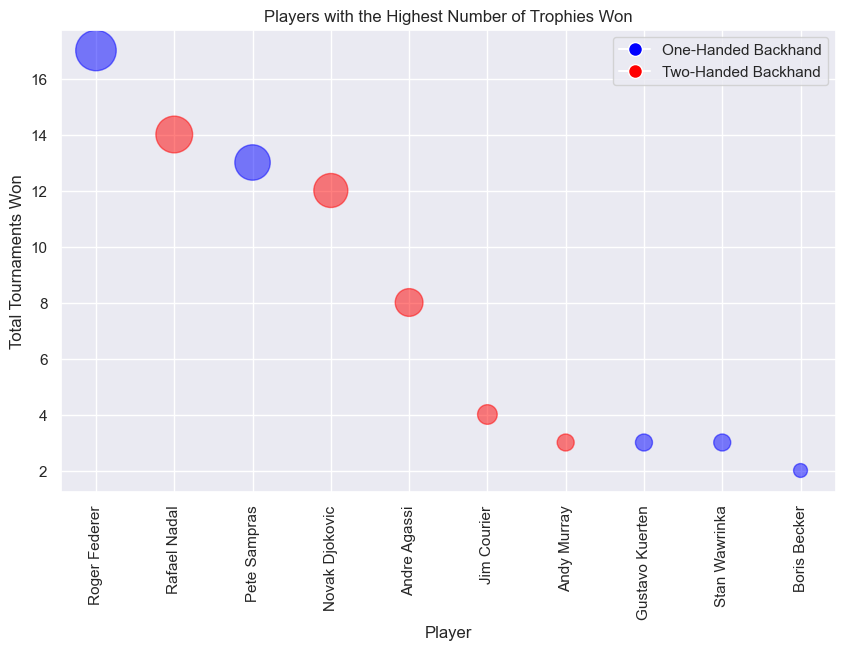

In [1076]:
color_mapping = {
    'One-Handed Backhand': 'blue',
    'Two-Handed Backhand': 'red'
}


plt.figure(figsize=(10, 6))
top_players = highest_winner.groupby('winner_name')['Tournaments_Won'].sum().nlargest(10)
x = range(len(top_players))
y = top_players.values
sizes = y * 50  # Adjust the scaling factor to control bubble sizes

colors = filtered_players['backhand'].map(color_mapping)



plt.scatter(x, y, s=sizes, alpha=0.5, c=colors)
plt.xticks(x, top_players.index, rotation=90)
plt.xlabel('Player')
plt.ylabel('Total Tournaments Won')
plt.title('Players with the Highest Number of Trophies Won')
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in color_mapping.values()]
legend_labels = list(color_mapping.keys())
plt.legend(legend_handles, legend_labels)
plt.savefig('top-players.png')
plt.show()


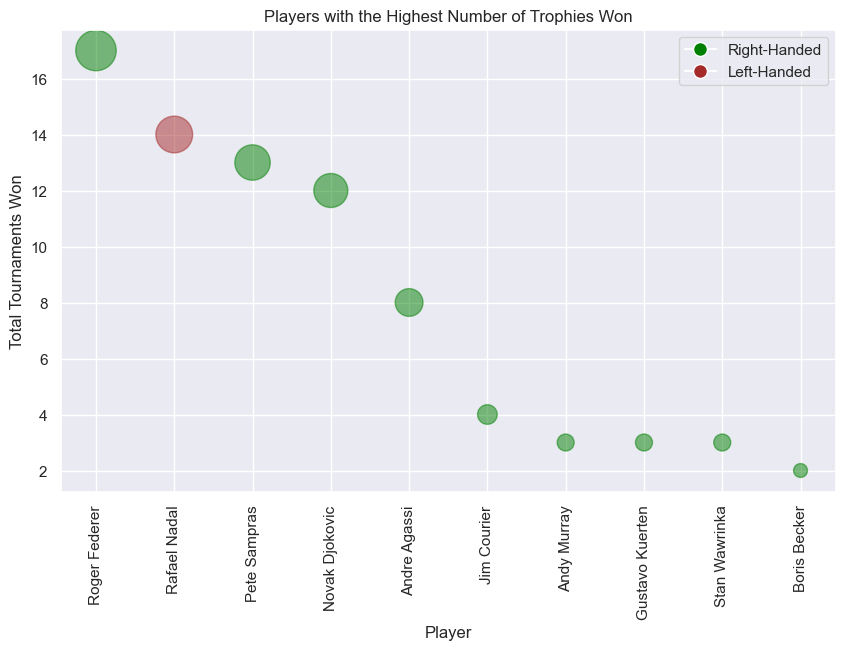

In [1079]:
color_mapping = {
    'Right-Handed': 'Green',
    'Left-Handed': 'Brown'
}


plt.figure(figsize=(10, 6))
top_players = highest_winner.groupby('winner_name')['Tournaments_Won'].sum().nlargest(10)
x = range(len(top_players))
y = top_players.values
sizes = y * 50  # Adjust the scaling factor to control bubble sizes

colors = filtered_players['handedness'].map(color_mapping)



plt.scatter(x, y, s=sizes, alpha=0.5, c=colors)
plt.xticks(x, top_players.index, rotation=90)
plt.xlabel('Player')
plt.ylabel('Total Tournaments Won')
plt.title('Players with the Highest Number of Trophies Won')
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in color_mapping.values()]
legend_labels = list(color_mapping.keys())
plt.legend(legend_handles, legend_labels)
plt.savefig('top-players.png')
plt.show()


In [1080]:
final_matches=filtered_df[filtered_df['tourney_round_name']=='Finals']
final_matches=final_matches[['tourney_slug','year','loser_name']]

In [1081]:
final_matches

,tourney_slug,year,loser_name
124,australian-open,1991,Ivan Lendl
1393,roland-garros,1991,Andre Agassi
1699,wimbledon,1991,Boris Becker
2474,us-open,1991,Jim Courier
3486,australian-open,1992,Stefan Edberg
...,...,...,...
90486,us-open,2015,Roger Federer
91614,australian-open,2016,Andy Murray
93169,roland-garros,2016,Andy Murray
93631,wimbledon,2016,Milos Raonic


## How many times have players lost in the final

In [1082]:
loser_counts = final_matches['loser_name'].value_counts().sort_values(ascending=True)
filtered_losers = loser_counts[loser_counts >= 3]
filtered_names = filtered_losers.index.tolist()
filtered_losers = final_matches[final_matches['loser_name'].isin(filtered_names)]


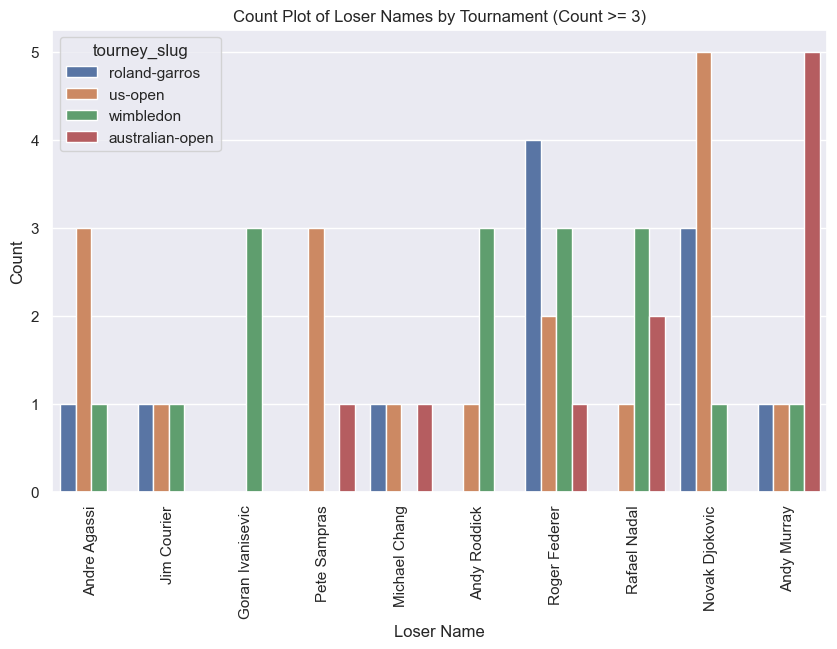

In [1083]:
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_losers, x='loser_name', hue='tourney_slug')
plt.xticks(rotation=90)
plt.xlabel('Loser Name')
plt.ylabel('Count')
plt.title('Count Plot of Loser Names by Tournament (Count >= 3)')
plt.show()

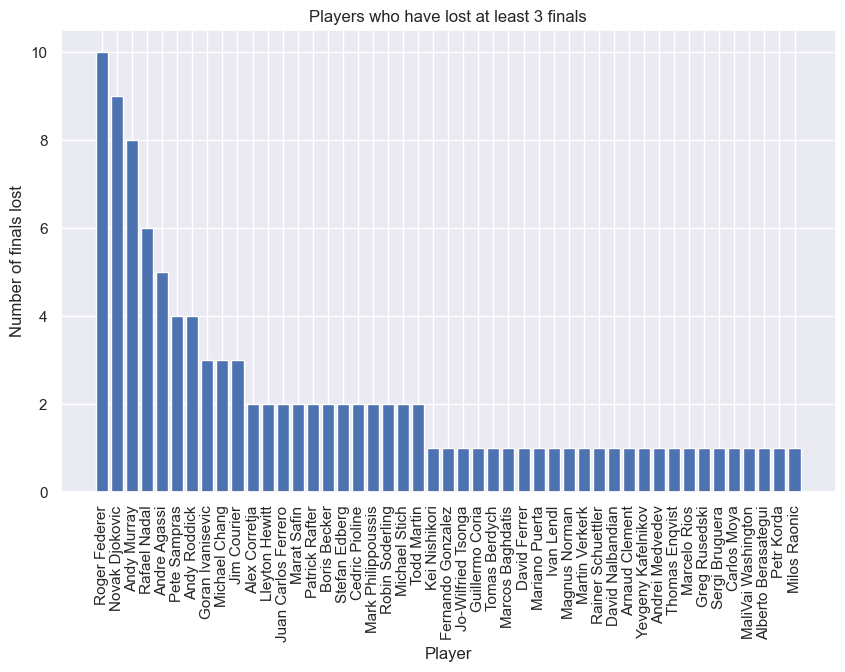

In [1084]:
plt.figure(figsize=(10, 6))
plt.bar(loser_count_df['player_name'], loser_count_df['count'])
plt.xlabel('Player')
plt.ylabel('Number of finals lost')
plt.title('Players who have lost at least 3 finals')

plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

plt.show()

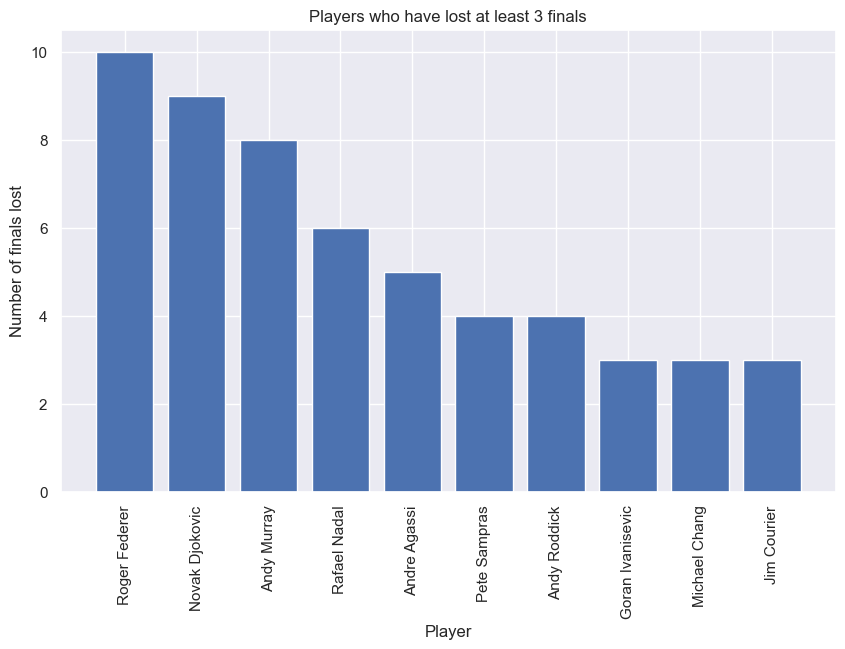

In [1085]:
plt.figure(figsize=(10, 6))
plt.bar(loser_count_3['player_name'], loser_count_3['count'])
plt.xlabel('Player')
plt.ylabel('Number of finals lost')
plt.title('Players who have lost at least 3 finals')

plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

plt.show()

In [1086]:
final_matches_winner=filtered_df[filtered_df['tourney_round_name']=='Finals']
final_matches_winner=final_matches_winner[['tourney_slug','year','winner_name']]

In [1087]:
winner_counts = final_matches_winner['winner_name'].value_counts().sort_values(ascending=True)
filtered_winners = winner_counts[winner_counts >= 3]
filtered_names_winner = filtered_winners.index.tolist()
filtered_winners = final_matches_winner[final_matches_winner['winner_name'].isin(filtered_names)]

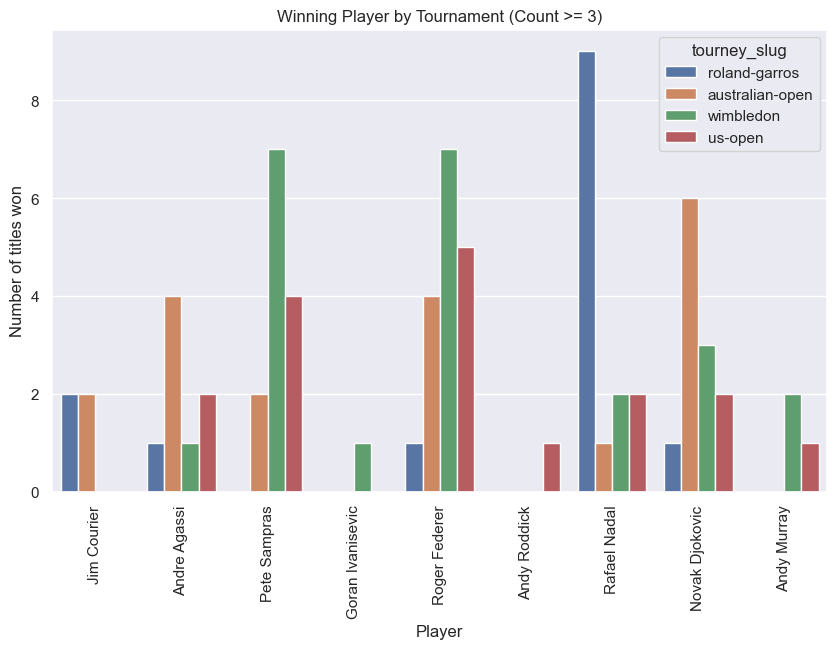

In [1534]:
plt.figure(figsize=(10, 6))
sns.countplot(data=filtered_winners, x='winner_name', hue='tourney_slug')
plt.xticks(rotation=90)
plt.xlabel('Player')
plt.ylabel('Number of titles won')
plt.title('Winning Player by Tournament (Count >= 3)')
plt.show()

In [1089]:
player_df

,player_id,player_slug,first_name,last_name,player_url,flag_code,residence,birthplace,birthdate,birth_year,birth_month,birth_day,turned_pro,weight_lbs,weight_kg,height_ft,height_inches,height_cm,handedness,backhand
0,a002,ricardo-acuna,Ricardo,Acuna,http://www.atpworldtour.com/en/players/ricardo...,CHI,"Jupiter, FL, USA","Santiago, Chile",1958.01.13,1958.0,1.0,13.0,0.0,150.0,68.0,"5'9""",69.0,175.0,NaN,NaN
1,a001,sadiq-abdullahi,Sadiq,Abdullahi,http://www.atpworldtour.com/en/players/sadiq-a...,NGR,NaN,NaN,1960.02.02,1960.0,2.0,2.0,0.0,0.0,0.0,"0'0""",0.0,0.0,NaN,NaN
2,a005,nelson-aerts,Nelson,Aerts,http://www.atpworldtour.com/en/players/nelson-...,BRA,NaN,"Cachoeira Do Sul, Brazil",1963.04.25,1963.0,4.0,25.0,0.0,165.0,75.0,"6'2""",74.0,188.0,NaN,NaN
3,a004,egan-adams,Egan,Adams,http://www.atpworldtour.com/en/players/egan-ad...,USA,"Palmetto, FL, USA","Miami Beach, FL, USA",1959.06.15,1959.0,6.0,15.0,0.0,160.0,73.0,"5'10""",70.0,178.0,NaN,NaN
4,a006,ronald-agenor,Ronald,Agenor,http://www.atpworldtour.com/en/players/ronald-...,USA,"Beverly Hills, California, USA","Rabat, Morocco",1964.11.13,1964.0,11.0,13.0,1983.0,180.0,82.0,"5'11""",71.0,180.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10907,z435,a-zorab,A.,Zorab,http://www.atpworldtour.com/en/players/a-zorab...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10908,z437,j-zimmermann,J.,Zimmermann,http://www.atpworldtour.com/en/players/j-zimme...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10909,z436,g-zinn,G.,Zinn,http://www.atpworldtour.com/en/players/g-zinn/...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10910,z440,c-zenger,C.,Zenger,http://www.atpworldtour.com/en/players/c-zenge...,GER,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [1090]:
pair_final=filtered_df[filtered_df['tourney_round_name']=='Finals'][['winner_name','loser_name']]

In [1091]:
pair_final

,winner_name,loser_name
124,Boris Becker,Ivan Lendl
1393,Jim Courier,Andre Agassi
1699,Michael Stich,Boris Becker
2474,Stefan Edberg,Jim Courier
3486,Jim Courier,Stefan Edberg
...,...,...
90486,Novak Djokovic,Roger Federer
91614,Novak Djokovic,Andy Murray
93169,Novak Djokovic,Andy Murray
93631,Andy Murray,Milos Raonic


In [1092]:
pair_final['player_pair'] = pair_final.apply(lambda row: ' vs '.join(sorted([row['winner_name'], row['loser_name']])), axis=1)


In [1093]:
pair_final

,winner_name,loser_name,player_pair
124,Boris Becker,Ivan Lendl,Boris Becker vs Ivan Lendl
1393,Jim Courier,Andre Agassi,Andre Agassi vs Jim Courier
1699,Michael Stich,Boris Becker,Boris Becker vs Michael Stich
2474,Stefan Edberg,Jim Courier,Jim Courier vs Stefan Edberg
3486,Jim Courier,Stefan Edberg,Jim Courier vs Stefan Edberg
...,...,...,...
90486,Novak Djokovic,Roger Federer,Novak Djokovic vs Roger Federer
91614,Novak Djokovic,Andy Murray,Andy Murray vs Novak Djokovic
93169,Novak Djokovic,Andy Murray,Andy Murray vs Novak Djokovic
93631,Andy Murray,Milos Raonic,Andy Murray vs Milos Raonic


In [1094]:
pair_counts = pair_final['player_pair'].value_counts().reset_index()
pair_counts=pd.DataFrame(pair_counts)
pair_counts['count']=pair_counts['player_pair']

In [1095]:
pair_counts.drop('player_pair',inplace=True,axis=1)

In [1096]:
pair_counts['player_pair']=pair_counts['index']

In [1097]:
pair_counts.drop('index',axis=1,inplace=True)

In [1098]:
pair_counts_filtered=pair_counts[pair_counts['count']>2]

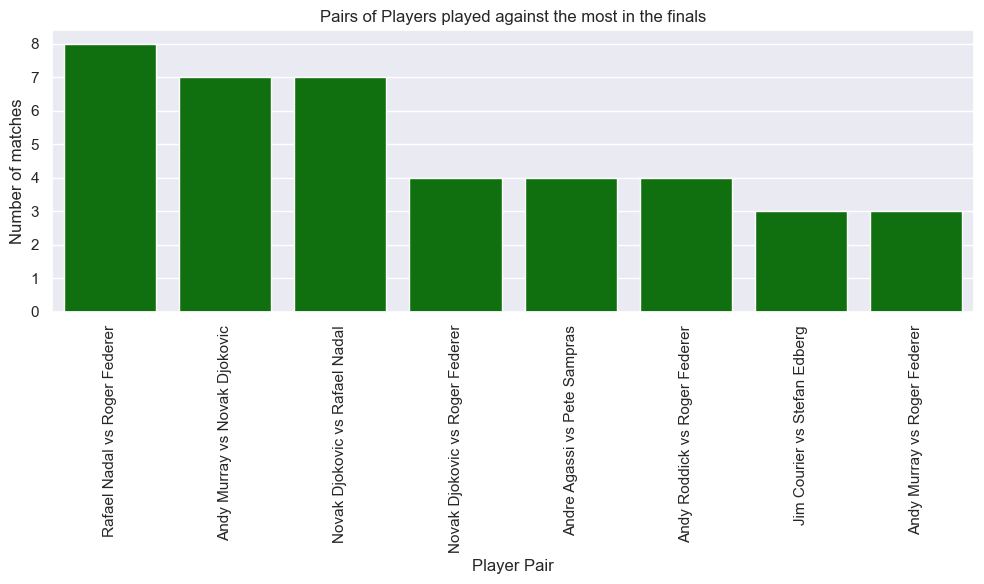

In [1533]:
plt.figure(figsize=(10, 6))

sns.barplot(data=pair_counts_filtered, x='player_pair', y='count',color='green')
plt.xticks(rotation=90)
plt.xlabel('Player Pair')
plt.ylabel('Number of matches')
plt.title('Pairs of Players played against the most in the finals')
plt.tight_layout()
plt.show()

In [1100]:
pair_players_all=filtered_df[['winner_name','loser_name']]
pair_players_all['player_pair'] = pair_players_all.apply(lambda row: ' vs '.join(sorted([row['winner_name'], row['loser_name']])), axis=1)


In [1101]:
pair_total = pair_players_all['player_pair'].value_counts().reset_index()
pair_total=pd.DataFrame(pair_total)
pair_total['count']=pair_total['player_pair']

In [1102]:
pair_total.drop('player_pair',axis=1,inplace=True)

In [1103]:
pair_total['player_pair']=pair_total['index']

In [1104]:
pair_total.drop('index',axis=1,inplace=True)

In [1105]:
pair_total_filtered=pair_total[pair_total['count']>6]

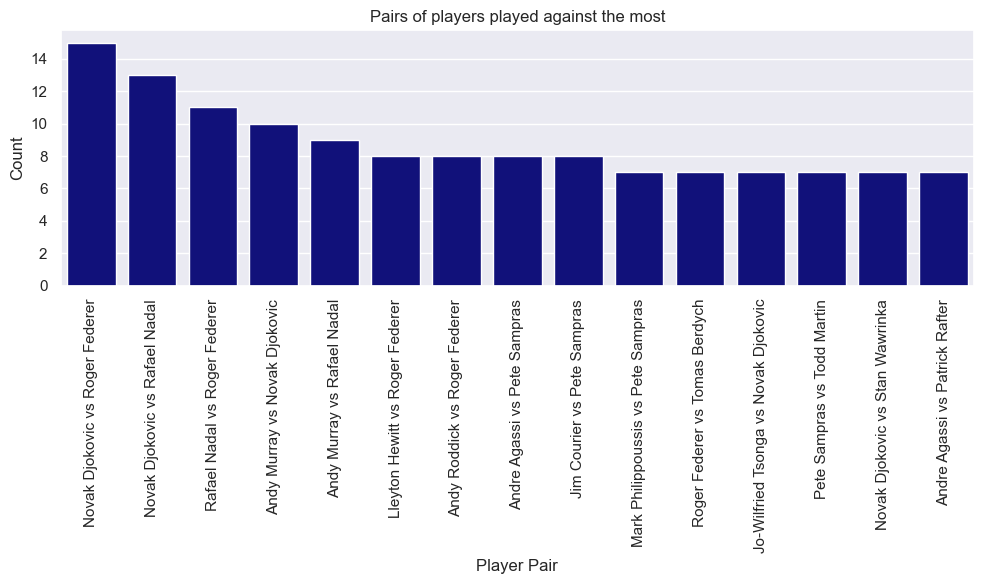

In [1106]:
plt.figure(figsize=(10, 6))

sns.barplot(data=pair_total_filtered, x='player_pair', y='count',color='darkblue')
plt.xticks(rotation=90)
plt.xlabel('Player Pair')
plt.ylabel('Count')
plt.title('Pairs of players played against the most')
plt.tight_layout()
plt.show()

In [1122]:
filtered_player_info=player_df[['flag_code','turned_pro','handedness','backhand']]

In [1123]:
nationality_count=filtered_player_info[['flag_code']]

In [1124]:
nationality_count_df=pd.DataFrame(nationality_count.value_counts()).reset_index()

In [1125]:
nationality_count_df = nationality_count_df.rename(columns={'flag_code': 'Nationality', 0: 'Count'})


In [1129]:
nationality_count_df.head()

,Nationality,Count
0,USA,1854
1,GBR,860
2,AUS,827
3,FRA,485
4,GER,356


In [1158]:
nationality_count_100=nationality_count_df[nationality_count_df['Count']>100]

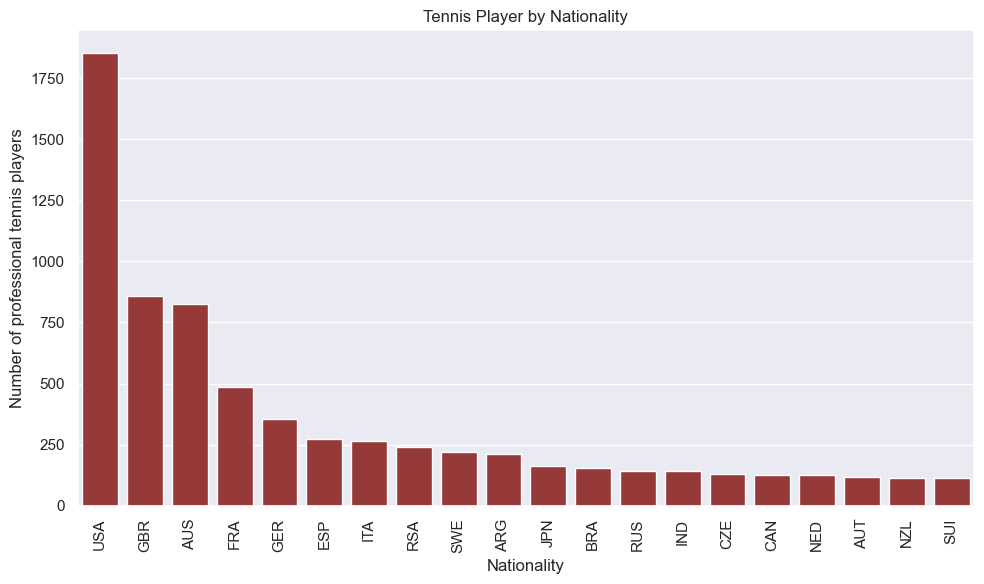

In [1536]:
plt.figure(figsize=(10, 6))

sns.barplot(data=nationality_count_100, x='Nationality', y='Count',color='brown')
plt.xticks(rotation=90)
plt.xlabel('Nationality')
plt.ylabel('Number of professional tennis players')
plt.title('Tennis Player by Nationality')
plt.tight_layout()
plt.show()

In [1190]:
top_players_df=pd.DataFrame(top_players).reset_index()
top_players_df = top_players_df.rename(columns={'winner_name': 'Full_name'})


In [1192]:
player_df['Full_name']= player_df['first_name'] + ' ' + player_df['last_name']


In [1195]:
top_player_merged=pd.merge(top_players_df,player_df,how='left',on='Full_name')

In [1196]:
top_player_nationality=top_player_merged[['Full_name','Tournaments_Won','flag_code']]

In [1197]:
top_player_nationality

,Full_name,Tournaments_Won,flag_code
0,Roger Federer,17,SUI
1,Rafael Nadal,14,ESP
2,Pete Sampras,13,USA
3,Novak Djokovic,12,SRB
4,Andre Agassi,8,USA
5,Jim Courier,4,USA
6,Andy Murray,3,GBR
7,Gustavo Kuerten,3,BRA
8,Stan Wawrinka,3,SUI
9,Boris Becker,2,GER


In [1212]:
top_player_nationality_sorted=top_player_nationality.groupby(['flag_code']).sum().reset_index().sort_values(by='Tournaments_Won',ascending=False)
top_player_nationality_sorted

,flag_code,Tournaments_Won
6,USA,25
5,SUI,20
1,ESP,14
4,SRB,12
0,BRA,3
2,GBR,3
3,GER,2


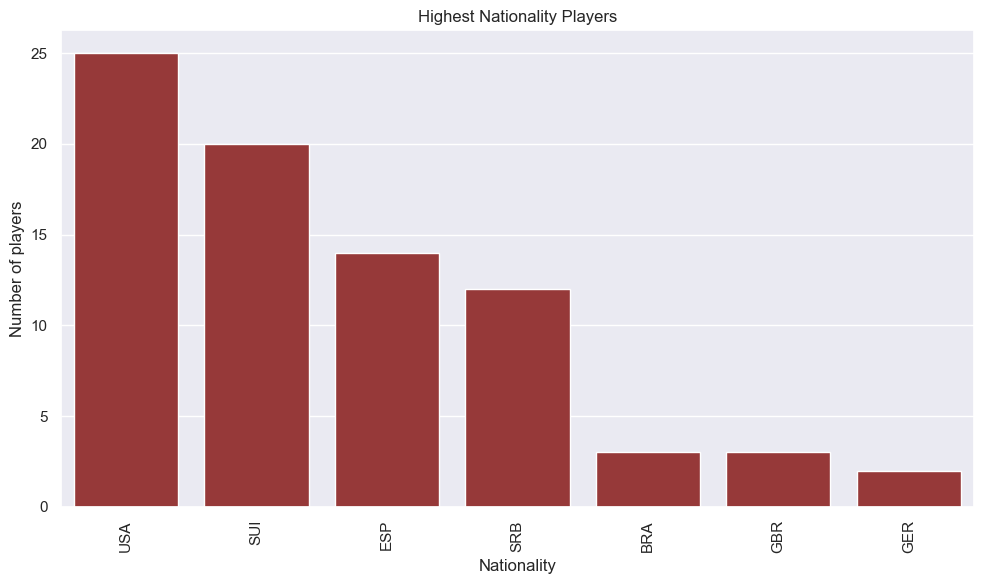

In [1540]:
plt.figure(figsize=(10, 6))

sns.barplot(data=top_player_nationality_sorted, x='flag_code',y='Tournaments_Won',color='brown')
plt.xticks(rotation=90)
plt.xlabel('Nationality')
plt.ylabel('Number of players')
plt.title('Highest Nationality Players')
plt.tight_layout()
plt.show()

In [1553]:
filtered_player_info_2=player_df[['flag_code','turned_pro']]
filtered_player_info_2.dropna(inplace=True)
filtered_player_info_2 = filtered_player_info_2[filtered_player_info_2['turned_pro'] != 0]
filtered_player_info_2['turned_pro'] = filtered_player_info_2['turned_pro'].astype(int)
filtered_player_info_2

,flag_code,turned_pro
4,USA,1983
13,SWE,1983
18,USA,1984
19,USA,1984
20,AUT,1988
...,...,...
10860,SRB,2006
10863,EST,2008
10868,CHN,2005
10877,GER,2013


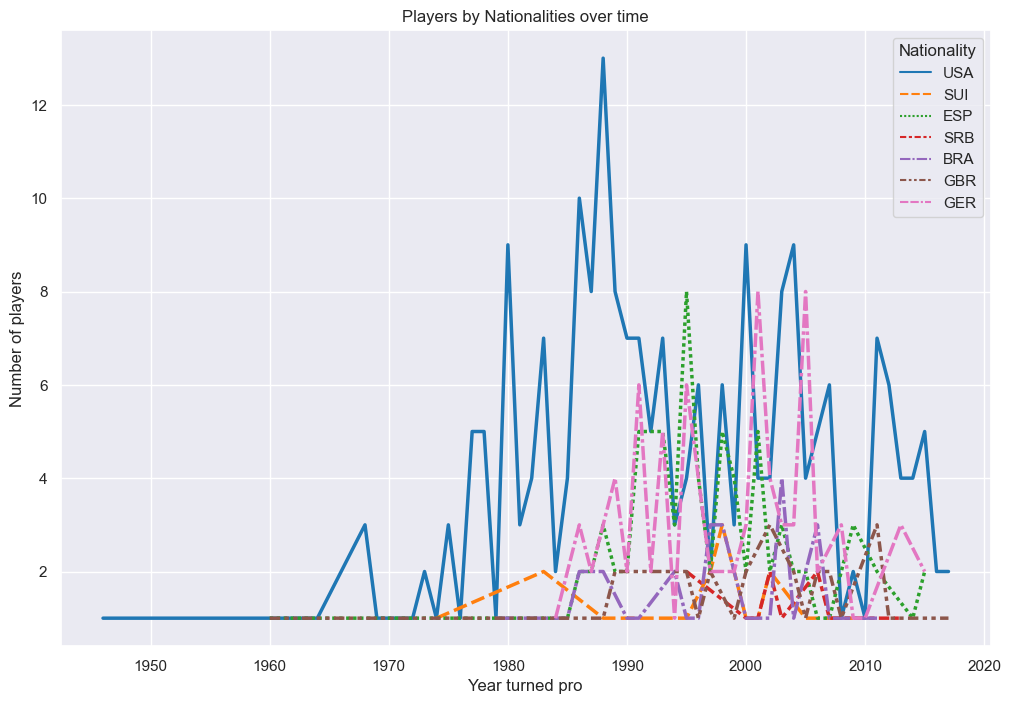

In [1563]:
selected_flags = ['USA', 'SUI', 'ESP', 'SRB', 'BRA', 'GBR', 'GER']

filtered_data = filtered_player_info_2[filtered_player_info_2['flag_code'].isin(selected_flags)]

flag_counts = filtered_data.groupby(['turned_pro', 'flag_code']).size().unstack()

plt.figure(figsize=(12, 8))
sns.lineplot(data=flag_counts[selected_flags], palette='tab10', linewidth=2.5)
plt.xlabel('Year turned pro')
plt.ylabel('Number of players')
plt.title('Players by Nationalities over time')
plt.legend(title='Nationality')
plt.grid(True)
plt.show()


## Using Random Forest Classifer to predict the pair of players in the final

In [1725]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [1726]:
filtered_df.columns

Index(['tourney_year_id', 'tourney_order', 'tourney_slug',
       'tourney_url_suffix', 'tourney_round_name', 'round_order',
       'match_order', 'winner_name', 'winner_player_id', 'winner_slug',
       'loser_name', 'loser_player_id', 'loser_slug', 'winner_seed',
       'loser_seed', 'match_score_tiebreaks', 'winner_sets_won',
       'loser_sets_won', 'winner_games_won', 'loser_games_won',
       'winner_tiebreaks_won', 'loser_tiebreaks_won', 'match_id',
       'match_stats_url_suffix', 'year'],
      dtype='object')

In [1727]:
features = ['tourney_slug','winner_sets_won','loser_sets_won','winner_games_won','loser_games_won','winner_tiebreaks_won','loser_tiebreaks_won']
winner_target = 'winner_name'
loser_target = 'loser_name'

In [1728]:
predict_finals_df = filtered_df[filtered_df['tourney_round_name'] == 'Finals']


In [1729]:
X = predict_finals_df[features]
y_winner = predict_finals_df[winner_target]
y_loser = predict_finals_df[loser_target]

In [1730]:
X_encoded=pd.get_dummies(X)

In [1731]:
X_train, X_test, y_train_winner, y_test_winner, y_train_loser, y_test_loser = train_test_split(
    X_encoded, y_winner, y_loser, test_size=0.2, random_state=42
)

In [1732]:
rf_winner_classifier = RandomForestClassifier(n_estimators=100)
rf_winner_classifier.fit(X_train, y_train_winner)

RandomForestClassifier()

In [1733]:
y_pred_winner = rf_winner_classifier.predict(X_test)


In [1734]:
rf_loser_classifier = RandomForestClassifier(n_estimators=100)
rf_loser_classifier.fit(X_train, y_train_loser)


RandomForestClassifier()

In [1735]:
y_pred_loser = rf_loser_classifier.predict(X_test)


In [1736]:
accuracy_winner = accuracy_score(y_test_winner, y_pred_winner)
accuracy_loser = accuracy_score(y_test_loser, y_pred_loser)


In [1737]:
print(f"Winner Accuracy: {accuracy_winner}")
print(f"Loser Accuracy: {accuracy_loser}")

Winner Accuracy: 0.14285714285714285
Loser Accuracy: 0.14285714285714285


In [1738]:
df_2017=pd.read_csv('2017_tennis_data.csv')

In [1739]:
df_2017['year']=df_2017['tourney_year_id'].str[:4]
df_2017['year']=pd.to_numeric(df_2017['year'])
filtered_df_2017=df_2017[df_2017['tourney_slug'].isin(['us-open','australian-open','wimbledon','roland-garros'])]


In [1740]:
new_filtered_2017=filtered_df_2017[filtered_df_2017['tourney_round_name']=='Finals']
new_filtered_2017

,tourney_year_id,tourney_order,tourney_slug,tourney_url_suffix,tourney_round_name,round_order,match_order,winner_name,winner_player_id,winner_slug,loser_name,loser_player_id,loser_slug,winner_seed,loser_seed,match_score_tiebreaks,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,match_id,match_stats_url_suffix,year
199,2017-580,6,australian-open,/en/scores/archive/australian-open/580/2017/re...,Finals,1,1,Roger Federer,f324,roger-federer,Rafael Nadal,n409,rafael-nadal,17,9,64 36 61 36 63,3,2,24,20,0,0,2017-580-f324-n409,/en/scores/2017/580/MS001/match-stats,2017
1792,2017-520,33,roland-garros,/en/scores/archive/roland-garros/520/2017/results,Finals,1,1,Rafael Nadal,n409,rafael-nadal,Stan Wawrinka,w367,stan-wawrinka,4,3,62 63 61,3,0,18,6,0,0,2017-520-n409-w367,/en/scores/2017/520/MS001/match-stats,2017
2273,2017-540,40,wimbledon,/en/scores/archive/wimbledon/540/2017/results,Finals,1,1,Roger Federer,f324,roger-federer,Marin Cilic,c977,marin-cilic,3,7,63 61 64,3,0,18,8,0,0,2017-540-f324-c977,/en/scores/2017/540/MS001/match-stats,2017
3102,2017-560,53,us-open,/en/scores/archive/us-open/560/2017/results,Finals,1,1,Rafael Nadal,n409,rafael-nadal,Kevin Anderson,a678,kevin-anderson,1,28,63 63 64,3,0,18,10,0,0,2017-560-n409-a678,NaN,2017


In [1741]:
from sklearn.preprocessing import StandardScaler


In [1742]:
new_features = new_filtered_2017[['tourney_slug', 'winner_sets_won', 'loser_sets_won', 'winner_games_won', 'loser_games_won', 'winner_tiebreaks_won', 'loser_tiebreaks_won']]
new_features

,tourney_slug,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won
199,australian-open,3,2,24,20,0,0
1792,roland-garros,3,0,18,6,0,0
2273,wimbledon,3,0,18,8,0,0
3102,us-open,3,0,18,10,0,0


In [1743]:
X_test

,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,tourney_slug_australian-open,tourney_slug_roland-garros,tourney_slug_us-open,tourney_slug_wimbledon
25899,3,2,28,25,1,1,0,0,0,1
53115,3,1,22,16,0,0,0,1,0,0
51370,3,0,19,14,1,0,1,0,0,0
43533,3,2,23,23,0,0,0,1,0,0
37765,3,1,22,10,0,0,0,1,0,0
84615,3,1,22,17,0,0,0,1,0,0
81686,3,1,21,13,0,0,0,0,1,0
38745,3,1,23,18,0,0,0,0,1,0
8733,3,1,23,21,2,0,0,0,0,1
124,3,1,19,18,0,0,1,0,0,0


In [1744]:
new_features_encoded = pd.get_dummies(new_features)


In [1745]:
new_features_encoded

,winner_sets_won,loser_sets_won,winner_games_won,loser_games_won,winner_tiebreaks_won,loser_tiebreaks_won,tourney_slug_australian-open,tourney_slug_roland-garros,tourney_slug_us-open,tourney_slug_wimbledon
199,3,2,24,20,0,0,1,0,0,0
1792,3,0,18,6,0,0,0,1,0,0
2273,3,0,18,8,0,0,0,0,0,1
3102,3,0,18,10,0,0,0,0,1,0


In [1746]:
winner_predictions = rf_winner_classifier.predict(new_features_encoded)
winner_predictions

array(['Novak Djokovic', 'Juan Carlos Ferrero', 'Lleyton Hewitt',
       'Marat Safin'], dtype=object)

In [1747]:
loser_predictions = rf_loser_classifier.predict(new_features_encoded)
loser_predictions

array(['Roger Federer', 'Martin Verkerk', 'David Nalbandian',
       'Pete Sampras'], dtype=object)

## THANK YOU!!